## Лабораторная работа 6.
## Сетевые алгоритмы. Динамические алгоритмы поиска путей.

### Выполнил студент группы БВТ2002 Дубровин Олег

### Задание
Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом.

Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.

Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа. Данные представить в виде таблицы.

### Алгоритмы:
Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена

### Выполнение:

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
import time
from cmath import inf
import math
from operator import itemgetter
from queue import PriorityQueue

In [ ]:
def read_graph(path):
    matrix = []
    with open(path, 'r') as f:
        for line in f:
            numbers = []
            for num in line.split():
                numbers.append(int(num))
            matrix.append(numbers)
    return nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)

def get_matrix_with_inf(matrix):
    new_matrix=[]
    for i in range(len(matrix)):
        new_matrix.append([])
        for j in range(len(matrix)):
            if matrix[i, j] == 0 and j != i:
                new_matrix[i].append(inf)
            else:
                new_matrix[i].append(matrix[i, j])
    return new_matrix

def draw_graph(graph, path = None):
    colors = None
    print(graph.edges())
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

In [ ]:
class Graph:

    def __init__(self, vertices):
        self.count_verts = vertices
        self.graph_src = []
    
    def add_edge(self, from_v, to_v, weight):
        self.graph_src.append([from_v, to_v, weight])
    
    def read_from_matrix(self, matrix):
        for line in range(len(matrix)):
            for column in range(len(matrix)):
                self.add_edge(line, column, matrix[line][column])

    def refresh_data(self):
        self.count_verts = 0
        self.graph_src = []
    
    def set_vertices(self, vertices):
        self.count_verts = vertices

    def get_matrix(self):
        matrix = [[inf for z in range(self.count_verts)] for x in range(self.count_verts)]
        for from_v, to_v, weight in self.graph_src:
            matrix[from_v][to_v] = weight
        return matrix
    
    def rewrite_matrix(self, matrix):
        self.set_vertices = len(matrix)
        self.graph_src = []
        self.read_from_matrix(matrix)

    
    def print_arr(self, dist, start):
        print("distance from ", start, end=':\n')
        for i in range(self.count_verts):
            print(i, dist[i], sep=':\t')
    
    @staticmethod
    def _print_arr(dist, start, n):
        print("distance from ", start, end=':\n')
        for i in range(n):
            print(i, dist[i], sep=':\t')


def get_path_F(P, start, end):
    path = []
    x = start
    while x != end:
        path.append(x)
        x = P[x][end]
    path.append(end)
    return path


def get_path_D(pred, start, end):
    point = end
    path = [point]
    if len(pred) == 0:
        return []
    while point != start:
        path.append(pred[point])
        point = pred[point]
    path = path[-1:0:-1]
    path.append(end)
    return path


def get_path_B(pred, start, end):
    point = end
    path = [point]
    if end not in pred.keys():
        return []
    while point != start:
        path.append(pred[point])
        point = pred[point]
    path = path[-1:0:-1]
    path.append(end)
    return path


In [ ]:
def bellman_ford(graph, start):

    distance = [inf] * graph.count_verts
    distance[start] = 0
    pred = {}

    for i in range(graph.count_verts - 1):
        for from_v, to_v, weight in graph.graph_src:
            if distance[from_v] != inf and distance[from_v] + weight < distance[to_v]: 
                distance[to_v] = distance[from_v] + weight
                pred[to_v] = from_v

    for from_v, to_v, weight in graph.graph_src:
        if distance[from_v] != inf and distance[from_v] + weight < distance[to_v]:
            print("Graph contains negative weight cycle")
    return distance, pred


# дистанция от start до всех без отрицательных
# O(VlogV)


def dijkstra(graph, start):
    matrix = graph.get_matrix()
    n = graph.count_verts
    D = {v: inf for v in range(n)}
    D[start] = 0
    visited = []
    path = [-1] * n

    pq = PriorityQueue()
    pq.put((0, start))

    while not pq.empty():
        (dist, current_vertex) = pq.get()
        visited.append(current_vertex)

        for neighbor in range(n):
            if matrix[current_vertex][neighbor] != -1:
                distance = matrix[current_vertex][neighbor]
                if neighbor not in visited:
                    old_cost = D[neighbor]
                    new_cost = D[current_vertex] + distance
                    if new_cost < old_cost:
                        pq.put((new_cost, neighbor))
                        D[neighbor] = new_cost
                        path[neighbor] = current_vertex

    path[0] = 0    
    # graph._print_arr(D, start, n)
    return D, path

# дистанция от всех до всех + отрицательные
# O(V^3)
def floid(graph, start):

    matrix = graph.get_matrix()
    N = len(matrix)
    P = [[i for i in range(N)] for j in range(N)]

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = matrix[i][k] + matrix [k][j]
                if d < matrix[i][j]:
                    matrix[i][j] = d
                    P[i][j] = P[i][k]
    # graph.print_arr(matrix, start)
    return matrix, P


def levit(graph, start):
    matrix = graph.get_matrix()
    n = len(matrix)
    table = [inf for i in range(n)]
    table[start] = 0
    for_paths = [start for i in range(n)]
    m0 = set()
    m1 = [start]
    m2 = set(range(n))
    m2.remove(start)
    while len(m1):
        u = None #рассматриваемая вершина
        if len(m1):
            u = m1.pop(0)
        for i in range(n):
            if matrix[u][i] == inf:
                continue
            if i in m2:
                m2.remove(i)
                m1.append(i)
                w = table[u] + matrix[u][i]
                if w < table[i]:
                    table[i] = w
                    for_paths[i] = u
            elif i in m1:
                w = table[u] + matrix[u][i]
                if w < table[i]:
                    table[i] = w
                    for_paths[i] = u
            elif i in m0 and table[i] > table[u] + matrix[u][i]:
                m0.remove(i)
                m1.append(i)
                table[i] = table[u] + matrix[u][i]
                for_paths[i] = u
        m0.add(u)
    return table, for_paths


def gonson(matrix, start):

    for i in range(len(matrix)):
        matrix[i].append(inf)
    matrix.append([])
    for i in range(len(matrix)):
        matrix[-1].append(0)
    graph = Graph(len(matrix))
    graph.read_from_matrix(matrix)

    table = bellman_ford(graph, graph.count_verts - 1)[0]
    # print("from bellman_ford:\n", table)

    n = len(matrix)
    for i in range(n):
        for j in range(n):
            matrix[i][j] = matrix[i][j] + table[i] - table[j]
            
    for i in range(len(matrix)-1):
        matrix[i].remove(inf)
    matrix.pop(-1)

    # print("new matrix:")
    # graph._print_arr(matrix, 0, len(matrix))

    graph.refresh_data()
    graph.set_vertices(len(matrix))
    graph.read_from_matrix(matrix)
    table, path = dijkstra(graph, start)
    return table, path


def yena(graph, start, end, count):
    paths = []
    lengths = []
    distances, pred = bellman_ford(graph, start)
    path = get_path_B(pred, start, end)
    paths.append(path)
    lengths.append(distances[end])
    matrix = graph.get_matrix()

    mat = copy.deepcopy(matrix)
    for i in range(count-1):
        path = paths[-1]
        candidates_paths = []
        candidates_length = []
        for j in range(len(path) - 1):
            first = path[j]
            second = path[j+1]
            mat[first][second] = inf
            graph.rewrite_matrix(mat)
            distances, pred = bellman_ford(graph, start)
            if (len(pred.keys()) == 0):
                break
            new_path = get_path_B(pred, start, end)
            candidates_paths.append(new_path)
            candidates_length.append(distances[end])
        if (len(candidates_length) != 0):
            index = candidates_length.index(min(candidates_length))
            paths.append(candidates_paths[index])
            lengths.append(candidates_length[index])
    return paths, lengths


Bellman ford
[2, [0, 5, 2, 3, 4]]
0.006200075149536133

Dijkstra
[2, [0, 5, 2, 3, 4]]
0.0016522407531738281

Floid
[0, 5, 0, 9, 2, 2]
[-1, 0, -4, 5, -2, 1]
[3, 8, 0, 9, 2, 5]
[-6, -1, -6, 0, -7, -4]
[1, 6, 1, 10, 0, 3]
[1, 6, -2, 7, 0, 0]
path:  [0, 5, 2, 3, 4]
0.008055925369262695

Gonson
[2, [0, 5, 2, 3, 4]]
0.0004994869232177734

Yen's
length:  2
path: [0, 5, 2, 3, 4]
length:  3
path: [0, 1, 2, 3, 4]
0.0008268356323242188

Levit
[2, [0, 5, 2, 3, 4]]
0.00010561943054199219
[[0, 5, inf, inf, inf, 2], [inf, 0, -4, inf, inf, inf], [inf, inf, 0, 9, inf, inf], [inf, inf, inf, 0, -7, 3], [1, inf, inf, inf, 0, inf], [inf, inf, -2, inf, 8, 0]]
[(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (3, 5), (4, 0), (5, 2), (5, 4)]


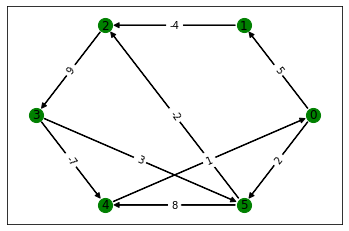

In [ ]:
def read_matrix(path):
    matrix = []
    with open(path, 'r') as f:
        for line in f:
            numbers = []
            for num in line.split():
                numbers.append(int(num))
            matrix.append(numbers)
    return matrix

def get_matrix_with_inf(matrix):
    new_matrix=[]
    for i in range(len(matrix)):
        new_matrix.append([])
        for j in range(len(matrix)):
            if matrix[i][j] == 0 and j != i:
                new_matrix[i].append(inf)
            else:
                new_matrix[i].append(matrix[i][j])
    return new_matrix


def main():

    main_matrix = get_matrix_with_inf(read_matrix('matrix.txt'))
    start = 0
    end = 4
    graphs = []
    for i in range(5):
        graph = Graph(len(main_matrix))
        graph.read_from_matrix(copy.deepcopy(main_matrix))
        graphs.append(graph)
    start_time = time.time()
    print("Bellman ford")
    ad, ap = bellman_ford(graphs[0], start)
    a = [ad[end], get_path_B(ap, start, end)]
    print(a)
    print(time.time() - start_time)
    start_time = time.time()

    print("\nDijkstra")
    bd, bp = dijkstra(graphs[1], start)
    b = [bd[end], get_path_D(bp, start, end)]
    print(b)
    print(time.time() - start_time)
    start_time = time.time()
    
    print("\nFloid")
    cd, cp = floid(graphs[2], start)
    c = [cd, get_path_F(cp, start, end)]
    for line in cd:
        print(line)
    print("path: ", c[1])
    print(time.time() - start_time)
    start_time = time.time()

    print("\nGonson")
    dd, dp = gonson(copy.deepcopy(main_matrix), start)
    d = [bd[end], get_path_D(bp, start, end)]
    print(d)
    print(time.time() - start_time)
    start_time = time.time()

    print("\nYen's")
    ep, el = yena(graphs[3], start, end, 3)
    for i in range(len(el)):
        print("length: ", el[i])
        print("path:", ep[i])
    print(time.time() - start_time)
    start_time = time.time()

    print("\nLevit")
    fd, fp = levit(graphs[4], start)
    f = [fd[end], get_path_D(fp, start, end)]
    print(f)
    print(time.time() - start_time)
    start_time = time.time()

    print(main_matrix)
    for i in range(len(main_matrix)):
      for j in range(len(main_matrix)):
        if main_matrix[i][j] == inf:
          main_matrix[i][j] = 0
    graph = nx.from_numpy_matrix(np.matrix(main_matrix), create_using=nx.DiGraph)
    draw_graph(graph)

main()

## Вывод

Я научился использовать алгоритмы поиска кратчейшего путь в графе, в ходе выполнения работы было выявленно, что:
- алгоритм Дейксты не работает корректно на графах с отрицательными ребрами,
- алгоритм беллмана решает проблему алгоритма дейкстры
- алгоритм джонсона так же решает проблему алгоритма дейстры, только он использует метод получения графа неотрицательных ребер
- алгоритм левита позволяет получить более быстрое решение на некоторых графах
- алгоритм флойда находит все пути из каждой вершины до остальных вершин 
- алгоритм Йена позволяет найти К самых быстрых путей